# Project: Hotel booking demand

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Modeling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.<br>

● What is the proportion of cancelation between different hotel types ?<br>
● How long people stay in each hotel?<br>
● Predict the hotel booking's cancellation<br>

In [44]:
# import statements for all of the packages  for help me
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter("ignore")
# to read data set 
df = pd.read_csv('hotel_bookings.csv')
df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
df.shape

(119390, 32)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.booking_changes                 

0         3
1         4
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: booking_changes, Length: 119390, dtype: int64

## Exploratory Data Analysis

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [7]:
df.booking_changes.mean()   

0.22112404724013737

Text(0, 0.5, 'count')

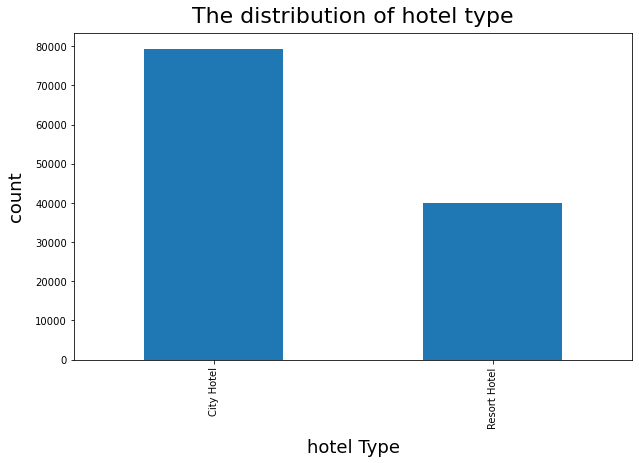

In [8]:
plt.figure(figsize=(10,6))
hotel_Type= df['hotel'].value_counts().plot.bar()
plt.title(' The distribution of hotel type ', fontsize=22, y=1.015)
plt.xlabel('hotel Type', fontsize=18, labelpad=10)
plt.ylabel('count', fontsize=18, labelpad=10)

In [9]:
# Plot all of the variable-to-variable relations as scatterplots
#sns.pairplot(df, height=1.2, aspect=1.5);

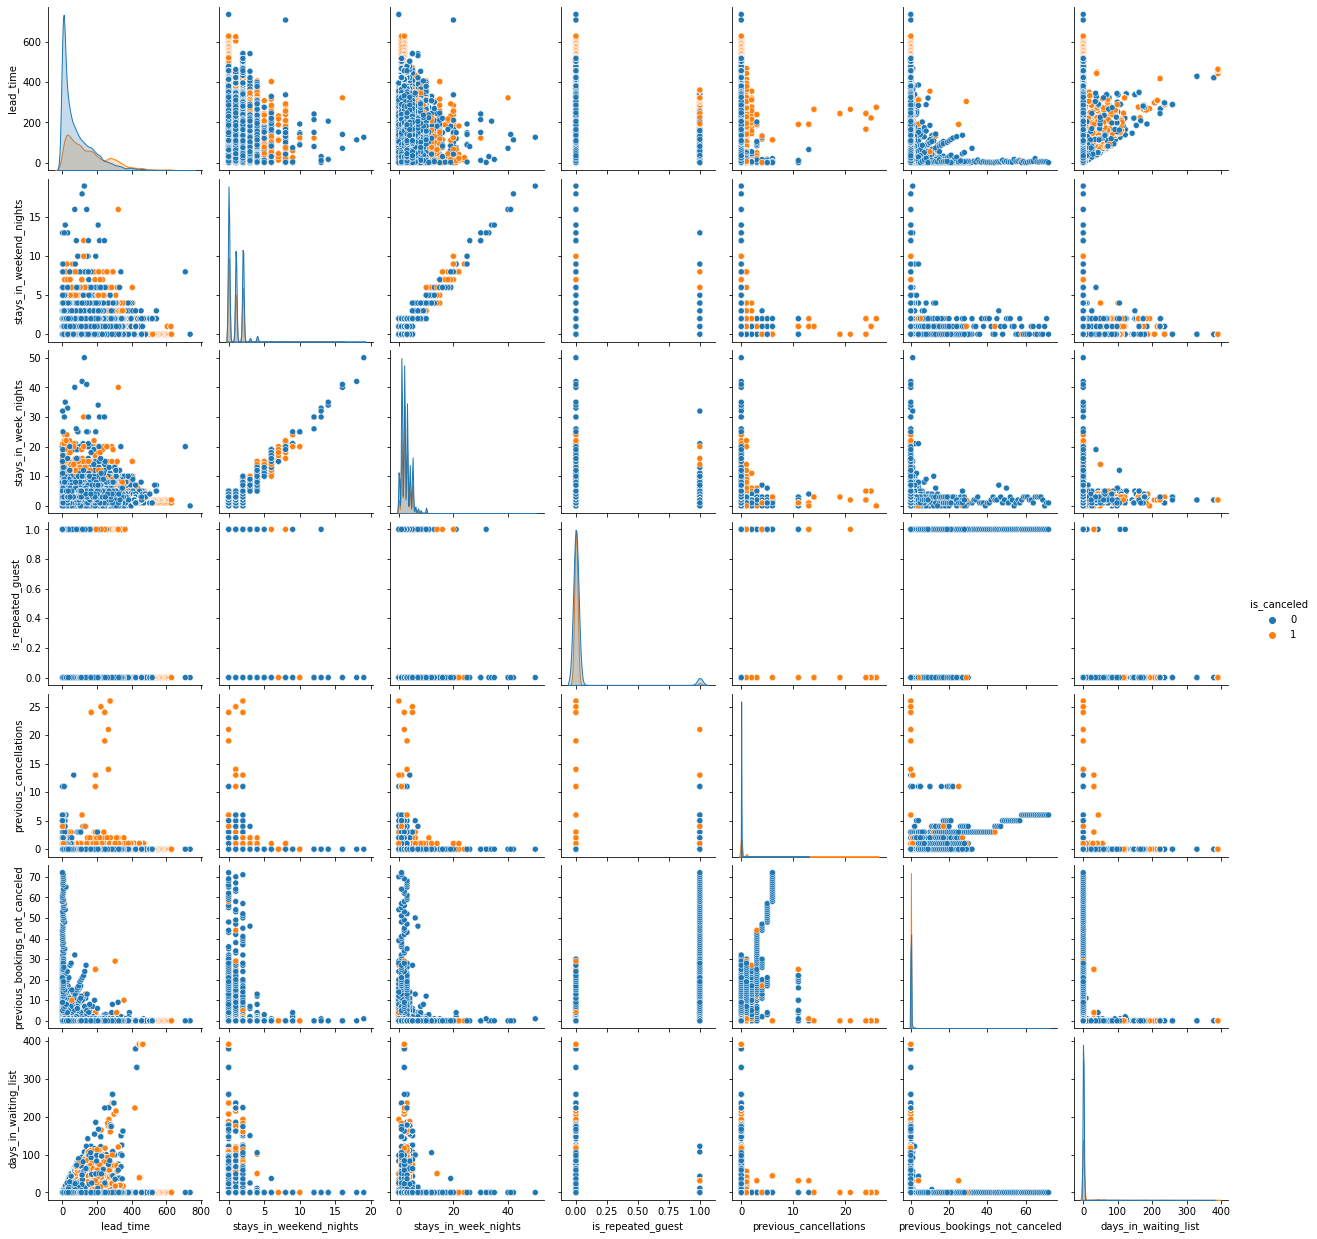

In [10]:
# to show relationship between some variable
data = df[["hotel","lead_time","is_canceled","arrival_date_month","stays_in_weekend_nights","stays_in_week_nights" ,"is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","deposit_type","days_in_waiting_list","customer_type"]]
sns.pairplot(data, hue="is_canceled",diag_kind='kde');

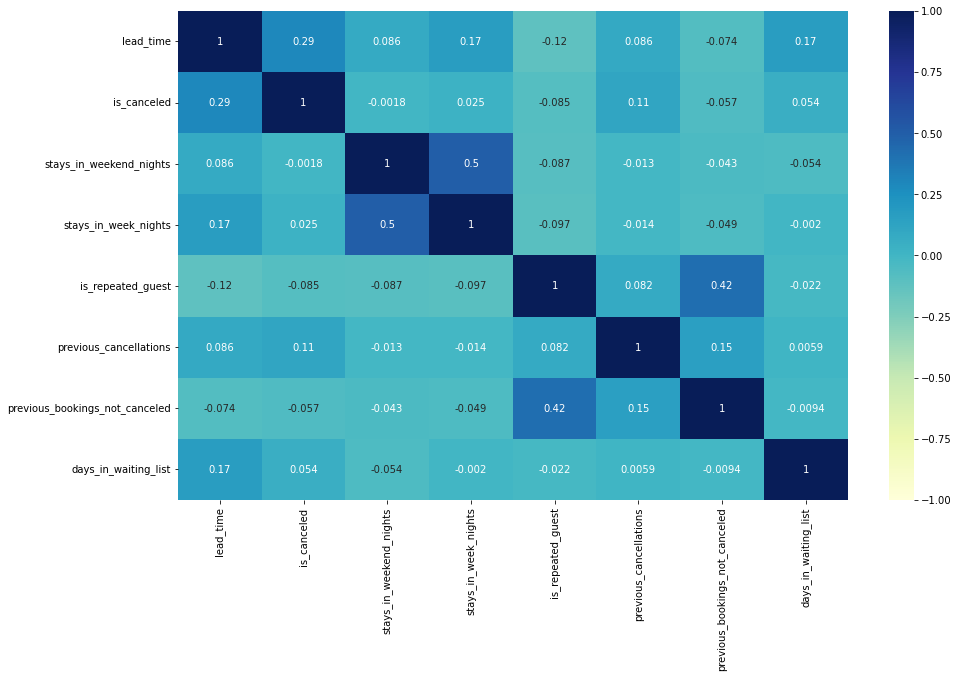

In [11]:
plt.figure(figsize=(15, 9))

sns.heatmap(data.corr(),  cmap="YlGnBu", annot=True, vmin=-1, vmax=1);

## Data Wrangling

- drop some fearure not neccray 
- drop missing value and duplicate row 
- change type for customer_type , hotel to categary 

In [12]:
df.drop(['agent','company', 'deposit_type','distribution_channel','market_segment']  , axis = 1 ,inplace = True)

In [13]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

In [14]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [15]:
df.shape

(118898, 29)

In [16]:
df.duplicated()
# duplicated rows before drop
sum(df.duplicated()) #31984
df.drop_duplicates(inplace = True)

In [17]:
sum(df.duplicated()) #no duplicated
df.shape

(86909, 29)

In [18]:
# Convert datatype for customer_type to category type: Transient and Transient-Party ,  Contract and  Group
df['customer_type'] = df.customer_type.astype('category')
df.customer_type.value_counts()

Transient          71549
Transient-Party    11684
Contract            3139
Group                537
Name: customer_type, dtype: int64

In [19]:
df['is_canceled'] = df.is_canceled.astype('int')
df.is_canceled.value_counts()


0    62931
1    23978
Name: is_canceled, dtype: int64

In [20]:
# View the correlations
df.corr()['is_canceled'].abs().sort_values(ascending=False)[1:11]

required_car_parking_spaces    0.183738
lead_time                      0.183618
adr                            0.126701
total_of_special_requests      0.121826
booking_changes                0.094073
is_repeated_guest              0.090160
arrival_date_year              0.087813
stays_in_week_nights           0.082761
adults                         0.080204
children                       0.067044
Name: is_canceled, dtype: float64

In [21]:
df_canceled = df[(df['is_canceled'] == 1)]
df_NoCanceled = df[(df['is_canceled'] == 0)]

In [22]:
df.reservation_status.value_counts()

Check-Out    62931
Canceled     22968
No-Show       1010
Name: reservation_status, dtype: int64

In [23]:
df=pd.get_dummies(df, columns=["customer_type", "reservation_status"], prefix=["customer", "status"])

In [24]:
#hotel_city= df[(df['hotel'] == 'Resort Hotel')]
#hotel_resort = df[(df['hotel'] == 'City Hotel')]
#replace city hotel to 1 and resort hotel 0 
df.hotel=df.hotel.str.replace(('City Hotel'),('1'))
df.hotel=df.hotel.str.replace(('Resort Hotel'),('0'))
df.hotel=df.hotel.astype('int')

In [25]:
df.hotel.value_counts()

1    53401
0    33508
Name: hotel, dtype: int64

In [26]:
#replace name month to number month to apply model 
df.arrival_date_month=df.arrival_date_month.str.replace(('January'),('1'))
df.arrival_date_month=df.arrival_date_month.str.replace(('February'),('2'))
df.arrival_date_month=df.arrival_date_month.str.replace(('March'),('3'))
df.arrival_date_month=df.arrival_date_month.str.replace(('April'),('4'))
df.arrival_date_month=df.arrival_date_month.str.replace(('May'),('5'))
df.arrival_date_month=df.arrival_date_month.str.replace(('June'),('6'))
df.arrival_date_month=df.arrival_date_month.str.replace(('July'),('7'))
df.arrival_date_month=df.arrival_date_month.str.replace(('August'),('8'))
df.arrival_date_month=df.arrival_date_month.str.replace(('September'),('9'))
df.arrival_date_month=df.arrival_date_month.str.replace(('October'),('10'))
df.arrival_date_month=df.arrival_date_month.str.replace(('November'),('11'))
df.arrival_date_month=df.arrival_date_month.str.replace(('December'),('12'))
df.arrival_date_month=df.arrival_date_month.astype('int')

In [27]:
df.arrival_date_month.value_counts()

8     11228
7     10020
5      8341
4      7868
6      7752
3      7457
10     6883
9      6654
2      6040
12     5080
11     4950
1      4636
Name: arrival_date_month, dtype: int64

# What is the proportion of cancelation between different hotel types ?

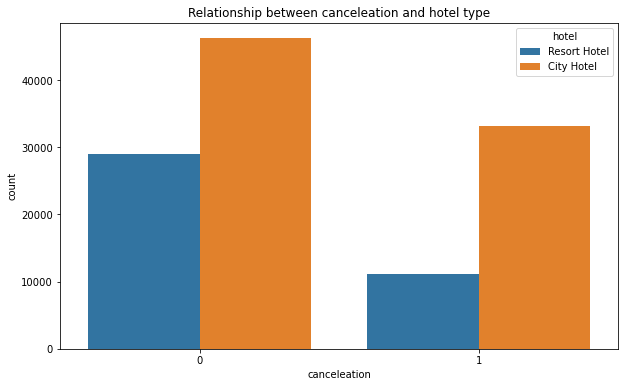

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'is_canceled', hue = 'hotel')
plt.title('Relationship between canceleation and hotel type')
plt.xlabel('canceleation')
plt.ylabel('count');
plt.savefig("canceleation.png");

The chart shows that the most canceled reservations for the type of city hotels but still this chart ambiguous.

# How long people stay in each hotel?

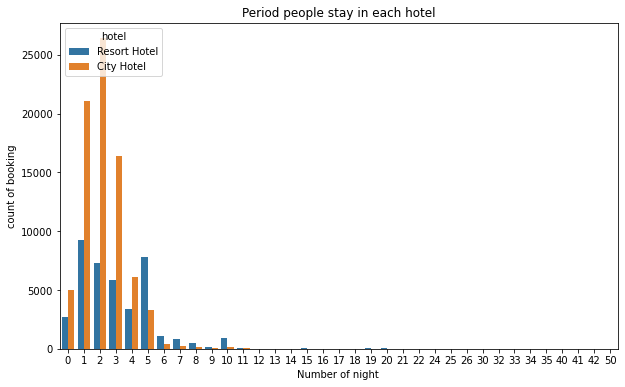

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'stays_in_week_nights', hue = 'hotel')
plt.title('Period people stay in each hotel')
plt.xlabel('Number of night ')
plt.ylabel('count of booking');
plt.savefig("Period stay.png");

The charts depicts number of nights people stay in city hotel has more vacationers for the short term and resort hotel a different rate, between 1 to 5 nights for staying long term

# Modeling

In [32]:
data = df[["hotel","lead_time","arrival_date_month","arrival_date_week_number","arrival_date_day_of_month","stays_in_weekend_nights","stays_in_week_nights" ,"adults","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes","required_car_parking_spaces","days_in_waiting_list","customer_Contract","customer_Group","customer_Transient","customer_Transient-Party","status_Canceled","status_Check-Out","status_No-Show"]]


In [33]:
## Initialize X, y and split dataset
df = df.copy()
y = df['is_canceled']
#x = df.drop(['is_canceled'], axis=1)
x= data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86909 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86909 non-null  int32  
 1   is_canceled                     86909 non-null  int32  
 2   lead_time                       86909 non-null  int64  
 3   arrival_date_year               86909 non-null  int64  
 4   arrival_date_month              86909 non-null  int32  
 5   arrival_date_week_number        86909 non-null  int64  
 6   arrival_date_day_of_month       86909 non-null  int64  
 7   stays_in_weekend_nights         86909 non-null  int64  
 8   stays_in_week_nights            86909 non-null  int64  
 9   adults                          86909 non-null  int64  
 10  children                        86909 non-null  float64
 11  babies                          86909 non-null  int64  
 12  meal                           

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [46]:
model.fit(x_train, y_train) # find the model parameters

LogisticRegression()

In [53]:
y_predicted = model.predict(x_test) # get me the output

print(y_predicted) # output of model
#print(x_test)      # input of model

[1 0 0 ... 1 1 1]


In [52]:
model.score(x_test,y_test)

1.0